# Epidemic Modeller Project

This notebook goes through some example usages of the project.

## Basic Model

In [13]:
import matplotlib.pyplot as plt
import math as maths
#import importlib

from epidemicmodeller import basic_model, basic_model_renderer
"""
# If running the code again, the code behind the scenes may have changed.
# This ensures it gets re-imported correctly to ensure it is using up-to-date code.
if "model" in locals().keys():
    importlib.reload(basic_model)
    importlib.reload(basic_model_renderer)
else:
    from epidemicmodeller import basic_model, basic_model_renderer
"""
# Create the model with some parameters and then run a simulation.
m = basic_model.BasicModel({"N": 400, "I": 1, "gamma": 1/6, "beta": 1/4, "b": 1})
output = m.run_model()

print(f"Model took {output.simulation_time:0.2f} seconds to run, it lasted {output.duration} days, "
      + f"and had a final size of {output.final_size}")


Model took 2.98 seconds to run, it lasted 86.1 days, and had a final size of 398


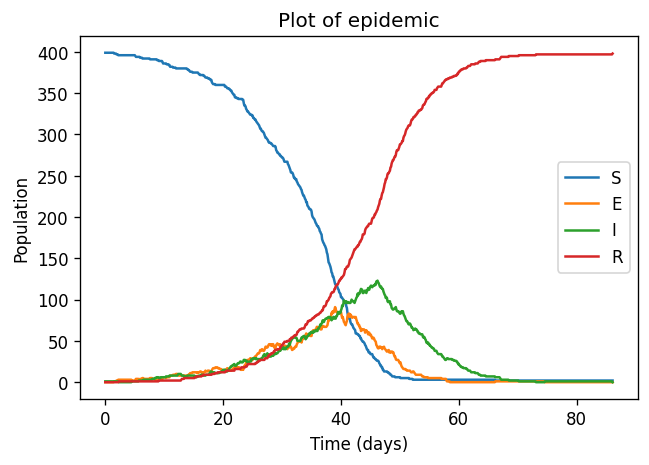

In [14]:
# Here we create a plot of each of the classes over the duration of the simulated epidemic.
fig, ax = plt.subplots(dpi=120)
ax.plot(output.classes["t"], output.classes["S"])
ax.plot(output.classes["t"], output.classes["E"])
ax.plot(output.classes["t"], output.classes["I"])
ax.plot(output.classes["t"], output.classes["R"])
ax.legend(["S", "E", "I", "R"])
ax.set(xlabel="Time (days)", ylabel="Population", title="Plot of epidemic")
plt.show()

In [15]:
# Then we render the simulated epidemic.
# This creates a new window with the visualisation.
basic_model_renderer.render_basic_model(output, screensize=1024)





## Compartment Model

In [16]:
from epidemicmodeller import compartment_model, compartment_model_renderer

num_compartments = 9
output = compartment_model.CompartmentModel({"N": 700, "I_0": 1, "gamma": 1/6, "beta": 1/3, "b": 1, "compartments": num_compartments,
                           "timesteps_per_day": 20}).run_model()
print(f"Compartment Model took {output.simulation_time:0.2f} seconds to run, it lasted {output.duration} days, "
      + f"and had a final size of {output.final_size}")


Too many travellers!!!
Compartment Model took 25.72 seconds to run, it lasted 169.1 days, and had a final size of 605


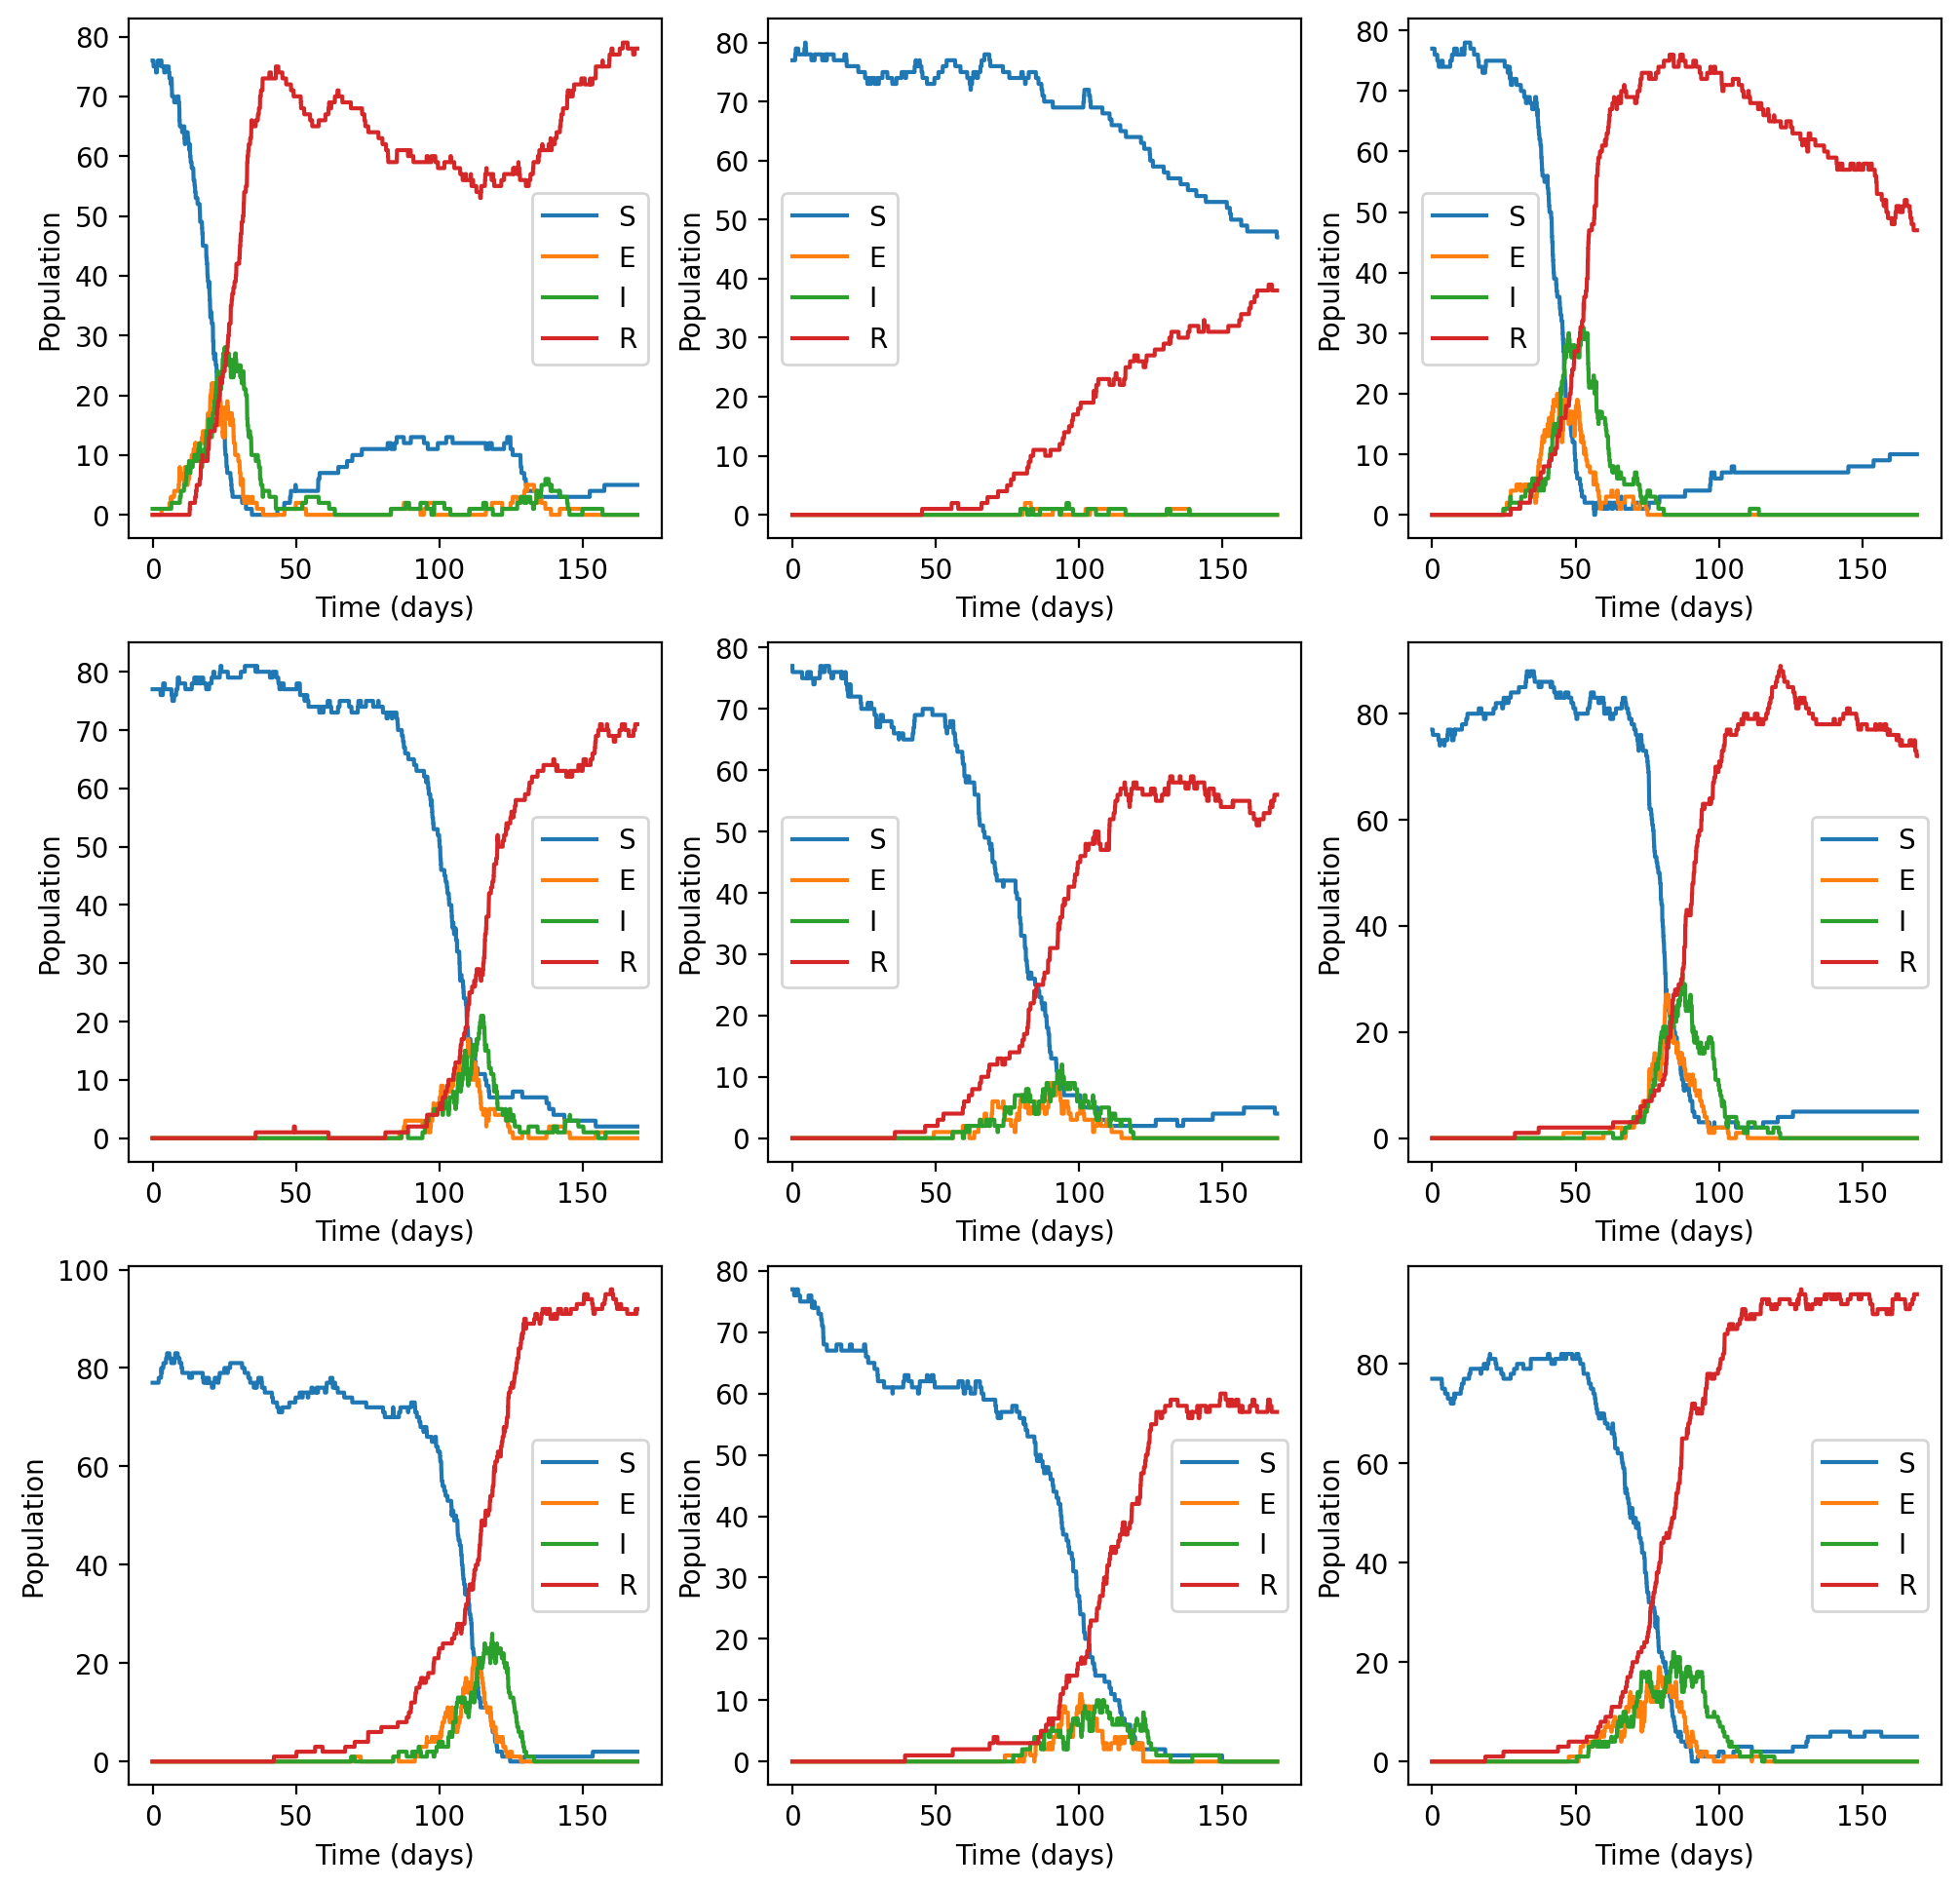

In [17]:
row_length = maths.ceil(maths.sqrt(num_compartments))
fig, ax = plt.subplots(row_length, row_length, figsize=(row_length*4, row_length*4), dpi=200)
for i in range(num_compartments):
    current_plot = ax[i//row_length][i%row_length]
    current_plot.plot(output.classes["t"], output.compartments[i].classes["S"])
    current_plot.plot(output.classes["t"], output.compartments[i].classes["E"])
    current_plot.plot(output.classes["t"], output.compartments[i].classes["I"])
    current_plot.plot(output.classes["t"], output.compartments[i].classes["R"])
    current_plot.legend(["S", "E", "I", "R"])
    current_plot.set(xlabel="Time (days)", ylabel="Population")
plt.show()

In [18]:
from epidemicmodeller import compartment_model_renderer
compartment_model_renderer.render_compartment_model(output, screensize=1024, days_per_second=3)